<a href="https://colab.research.google.com/github/karanbhatt1/DeepLearningModels/blob/main/CitrusFruitClassificationUsingDeeplearninng.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CITRUS FRUIT CLASSIFICATION USING DEEP LEARNING

> There are total 8 classes of citrus fruits.
<br>
> The dataset is formated in correct manner.
<br>
> Dataset contains 18669 images.
<br>
> Channel is BGR.



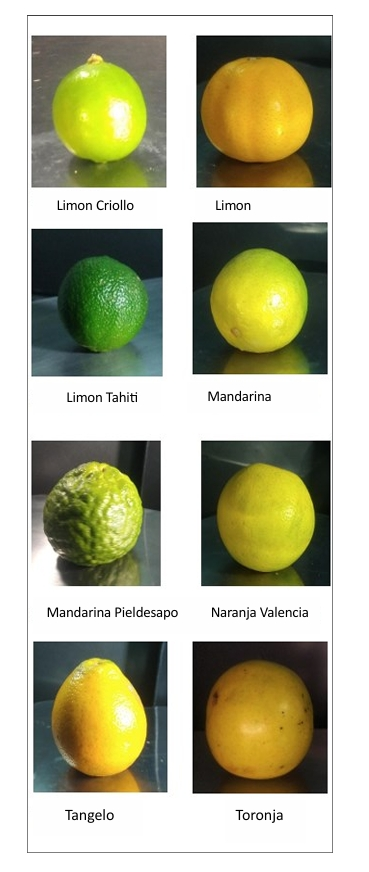

# Importing Important Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2 as cv
from google.colab.patches import cv2_imshow
import os
import pickle

# Mounting Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Function to load dataset from folder and add in lists

In [ ]:
def load_images_from_folder(dataset_path, target_size=(128, 128)):
    images = []
    labels = []
    class_names = os.listdir(dataset_path)

    for label, class_folder in enumerate(class_names):
        folder_path = os.path.join(dataset_path, class_folder)
        if not os.path.isdir(folder_path):
            continue

        for filename in os.listdir(folder_path):
            img_path = os.path.join(folder_path, filename)
            img = cv.imread(img_path)

            if img is not None:
                img = cv.resize(img, target_size)  # Resize all images
                images.append(img)
                labels.append(label)  # numeric label

    return np.array(images), np.array(labels), class_names


In [ ]:
train_path = '/content/drive/MyDrive/Datasets/CITRICOS_COL/train'

In [ ]:
train_images = load_images_from_folder(train_path)

NameError: name 'load_images_from_folder' is not defined

# Using Pickle to save the variables in drive

In [ ]:
# 1. Define the path where you want to save the file in your Google Drive
save_path = '/content/drive/MyDrive/Datasets/train_images_data.pkl'

In [ ]:
import pickle

# 1. To save the file in drive or the specified path.
# 2. Open the file in write-binary ('wb') mode and save the variable
# print("Saving train_images...")
# with open(save_path, 'wb') as f:
#     pickle.dump(train_images, f)
# print("Variable saved successfully!")

In [ ]:
# 2. Open the file in read-binary ('rb') mode and load the variable
print("Loading train_images...")
with open(save_path, 'rb') as f:
    train_images = pickle.load(f)
print("Variable loaded successfully!")
# Now you can use 'loaded_train_images' just like your original 'train_images'

Loading train_images...
Variable loaded successfully!


In [ ]:
train_images[0].shape # Dataset contains 18669 images with dimensions 128*128

(18669, 128, 128, 3)

In [ ]:
tr_image , label, class_name = train_images

NameError: name 'train_images' is not defined

In [ ]:
label

array([0, 0, 0, ..., 7, 7, 7])

In [ ]:
class_name

['LIMON_CRIOLLO',
 'LIMON_MANDARINO',
 'LIMON_TAHITI',
 'MANDARINA_ISRAELI',
 'NARANJA_VALENCIA',
 'MANDARINA_PIELDESAPO',
 'TORONJA',
 'TANGELO']

In [ ]:
tr_image

array([[[[ 36,  38,  38],
         [ 33,  35,  35],
         [ 33,  35,  35],
         ...,
         [ 48,  51,  49],
         [ 45,  47,  46],
         [ 46,  48,  48]],

        [[ 32,  34,  34],
         [ 34,  36,  36],
         [ 33,  35,  35],
         ...,
         [ 45,  47,  47],
         [ 42,  44,  44],
         [ 42,  44,  44]],

        [[ 30,  32,  32],
         [ 34,  36,  36],
         [ 33,  34,  34],
         ...,
         [ 47,  49,  50],
         [ 46,  48,  49],
         [ 45,  47,  47]],

        ...,

        [[ 62,  70,  63],
         [ 61,  69,  62],
         [ 63,  71,  65],
         ...,
         [ 54,  56,  57],
         [ 56,  58,  59],
         [ 54,  56,  57]],

        [[ 63,  71,  64],
         [ 61,  69,  62],
         [ 63,  71,  64],
         ...,
         [ 53,  55,  56],
         [ 57,  59,  60],
         [ 54,  58,  59]],

        [[ 64,  72,  65],
         [ 62,  70,  63],
         [ 62,  70,  63],
         ...,
         [ 59,  61,  62],
        

# Visualization  and Normalization of dataset.

> Rescaling of dataset.


In [ ]:
fig, axes = plt.subplots(10,5, figsize=(15, 20))
for i, ax in enumerate(axes.flatten()):
  img = tr_image[i]
  img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
  ax.imshow(img_rgb)
  ax.set_title(f"{class_name[0]} Image {i+1}")
  ax.axis('off')

In [ ]:
#Normalizing the dataset:
train_normalized = tr_image.astype('float32')/255.0

NameError: name 'tr_image' is not defined

# Saving The normalized Training images:

In [ ]:
normal_save_path = '/content/drive/MyDrive/Datasets/train_normalized_data.pkl'

In [ ]:
print("Loading train_images...")
with open(normal_save_path, 'rb') as f:
    train_normalized = pickle.load(f)
print("Variable loaded successfully!")

Loading train_images...
Variable loaded successfully!


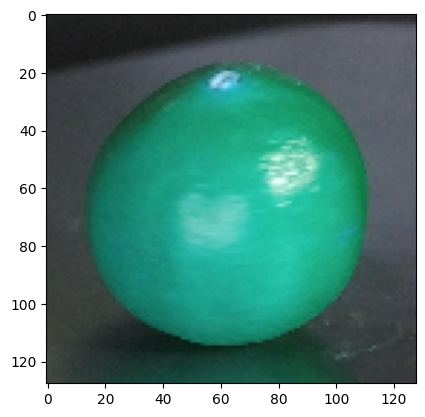

In [ ]:
img = train_normalized[0]
plt.imshow(img)

# preparing Model for training
# AND Saving the compiled model as pkl file

In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.metrics import Precision, Recall, AUC
from tensorflow.keras.callbacks import EarlyStopping

In [14]:
data_augmentation = tf.keras.Sequential([
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomTranslation(0.1,0.1),
    layers.RandomContrast(0.1),
    layers.RandomFlip('horizontal')
])

In [15]:
def custom_model():
  model = Sequential([
      #CNN
      tf.keras.Input(shape=(128,128,3)),
      data_augmentation,
      layers.Conv2D(32, (3,3), activation='relu'),
      layers.MaxPooling2D((2,2)),
      layers.Conv2D(64, (3,3), activation='relu'),
      layers.MaxPooling2D((2,2)),
      layers.Conv2D(128, (3,3), activation='relu'),
      layers.MaxPooling2D((2,2)),
      layers.Flatten(),

      # ANN
      layers.Dense(128, activation='relu'),
      layers.Dropout(0.2,seed=42),
      layers.Dense(64, activation='relu'),
      layers.Dropout(0.2,seed=42),
      layers.Dense(32, activation='relu'),
      layers.Dropout(0.2,seed=42),
      layers.Dense(8, activation='softmax'), # here we have 8 classes
  ])
  return model

In [16]:
model = custom_model()

In [17]:
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy', Precision(), Recall(), AUC()]
)

In [18]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │           264 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,315,240 (12.65 MB)

 Trainable params: 3,315,240 (12.65 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
compiled_model = '/content/drive/MyDrive/Datasets/compiled_model.pkl'

In [ ]:
print("loading...")
with open(compiled_model, 'rb') as f:
  model = pickle.load(f)
print("Loaded Successfully..")

loading...
Loaded Successfully..


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit()

<h1> As the dataset is so big to fit in the RAM </h1>

> So we are using custom generator or standard keras generator to make the batch of data and train the model.

# Custom Data Generator

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
train_data_gen = ImageDataGenerator(
    rescale = 1./255,
    validation_split = 0.2,
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

In [5]:
val_data_gen = ImageDataGenerator(
    rescale = 1./255,
    validation_split = 0.2
)

In [6]:
train_data = train_data_gen.flow_from_directory(
    '/content/drive/MyDrive/Datasets/CITRICOS_COL/train',
    target_size = (128,128),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 18669 images belonging to 8 classes.


In [7]:
vali_data = val_data_gen.flow_from_directory(
    '/content/drive/MyDrive/Datasets/CITRICOS_COL/super_test', # Super test
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation' # Set as validation data
)

Found 90 images belonging to 8 classes.


# Callbacks
1. ModelCheckpoint - [To save the best model]
2. EarlyStopping   - [ To stop the training process when accuracy is not incresing or any metric ]

In [8]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [20]:
full_model_checkpoint = ModelCheckpoint(
    filepath = '/content/drive/MyDrive/Datasets/model_checkpoint.keras',
    monitor = 'val_accuracy',
    mode = 'max',
    save_best_only = True,
    save_weights_only = False,

)

In [35]:
model_checkpoint = ModelCheckpoint(
    filepath = '/content/drive/MyDrive/Datasets/model_checkpoint_{epoch:02d}.weights.h5',
    save_weights_only = True,
    save_freq = 200,
    save_best_only = False,
)

In [36]:
early_callback = EarlyStopping(
    monitor = 'val_accuracy',
    patience = 3
)

# Fitting the Model

In [37]:
history  = model.fit(train_data, validation_data=vali_data, epochs=10,initial_epoch  = 6, callbacks=[full_model_checkpoint,model_checkpoint,early_callback])

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 7/10
584/584 ━━━━━━━━━━━━━━━━━━━━ 7201s 12s/step - accuracy: 0.8604 - auc: 0.9851 - loss: 0.4201 - precision: 0.8898 - recall: 0.8311 - val_accuracy: 0.2667 - val_auc: 0.6365 - val_loss: 5.7211 - val_precision: 0.2533 - val_recall: 0.2111
Epoch 8/10
584/584 ━━━━━━━━━━━━━━━━━━━━ 987s 2s/step - accuracy: 0.8849 - auc: 0.9892 - loss: 0.3469 - precision: 0.9084 - recall: 0.8615 - val_accuracy: 0.3000 - val_auc: 0.6496 - val_loss: 7.4821 - val_precision: 0.2805 - val_recall: 0.2556
Epoch 9/10
584/584 ━━━━━━━━━━━━━━━━━━━━ 995s 2s/step - accuracy: 0.8835 - auc: 0.9891 - loss: 0.3512 - precision: 0.9064 - recall: 0.8613 - val_accuracy: 0.3111 - val_auc: 0.6651 - val_loss: 5.8094 - val_precision: 0.2949 - val_recall: 0.2556
Epoch 10/10
584/584 ━━━━━━━━━━━━━━━━━━━━ 1034s 2s/step - accuracy: 0.8977 - auc: 0.9915 - loss: 0.3055 - precision: 0.9184 - recall: 0.8766 - val_accuracy: 0.3667 - val_auc: 0.6607 - val_loss: 6.9193 - val_precision: 0.3765 - val_recall: 0.3556


In [40]:
history.history['auc']

[0.9858160614967346,
 0.9882758259773254,
 0.9896513223648071,
 0.9911105632781982]

In [1]:
filepath = '/content/drive/MyDrive/Datasets/model_checkpoint.weights.h5'

In [23]:
w = model.load_weights(filepath)
print("Successfully loaded weights from the checkpoint at step 200.")

Successfully loaded weights from the checkpoint at step 200.


/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [25]:
for layer in model.layers:
  print(layer.name)

sequential
conv2d
max_pooling2d
conv2d_1
max_pooling2d_1
conv2d_2
max_pooling2d_2
flatten
dense
dropout
dense_1
dropout_1
dense_2
dropout_2
dense_3


In [30]:
conv2d_2_layer = model.get_layer('conv2d_2')

In [32]:
weight , biases = conv2d_2_layer.get_weights()

In [33]:
weight.shape

(3, 3, 64, 128)

In [17]:
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy', Precision(), Recall(), AUC()]
)